In [3]:
# %load vehicle_detection
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import keras
from moviepy.editor import VideoFileClip
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.core import Flatten, Dense, Activation, Reshape


from utils import load_weights, Box, yolo_net_out_to_car_boxes, draw_box




Using TensorFlow backend.


In [4]:
keras.backend.set_image_dim_ordering('th')

model = Sequential()
model.add(Convolution2D(16, (3, 3),input_shape=(3,448,448),padding='same',strides=(1,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32,(3,3) ,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Convolution2D(64,(3,3) ,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Convolution2D(128,(3,3) ,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Convolution2D(256,(3,3) ,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Convolution2D(512,(3,3) ,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Convolution2D(1024,(3,3) ,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Convolution2D(1024,(3,3) ,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Convolution2D(1024,(3,3) ,padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(Flatten())
model.add(Dense(256))
model.add(Dense(4096))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1470))


model.summary()
load_weights(model,'./yolo-tiny.weights')



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 448, 448)      448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 448, 448)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 224, 224)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 224, 224)      4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 224, 224)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 112, 112)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 112, 112)      18496     
__________

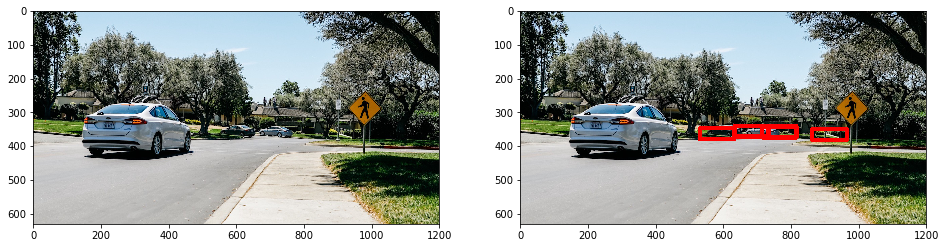

In [6]:
imagePath = './test_images/test10.jpg'
image = plt.imread(imagePath)
image_crop = image[300:650,500:,:]
resized = cv2.resize(image_crop,(448,448))
batch = np.transpose(resized,(2,0,1))
batch = 2*(batch/255.) - 1
batch = np.expand_dims(batch, axis=0)
out = model.predict(batch)
boxes = yolo_net_out_to_car_boxes(out[0], threshold = 0.17)



f,(ax1,ax2) = plt.subplots(1,2,figsize=(16,6))
ax1.imshow(image)
ax2.imshow(draw_box(boxes,plt.imread(imagePath),[[500,1280],[300,650]]))
plt.show()

In [4]:
def frame_func(image):
    crop = image[300:650,500:,:]
    resized = cv2.resize(crop,(448,448))
    batch = np.array([resized[:,:,0],resized[:,:,1],resized[:,:,2]])
    batch = 2*(batch/255.) - 1
    batch = np.expand_dims(batch, axis=0)
    out = model.predict(batch)
    boxes = yolo_net_out_to_car_boxes(out[0], threshold = 0.17)
    return draw_box(boxes,image,[[500,1280],[300,650]])


In [5]:
project_video_output = './project_video_output.mp4'
clip1 = VideoFileClip("./project_video2.mp4")

In [6]:
lane_clip = clip1.fl_image(frame_func) #NOTE: this function expects color images!!
%time lane_clip.write_videofile(project_video_output, audio=False)

[MoviePy] >>>> Building video ./project_video_output.mp4
[MoviePy] Writing video ./project_video_output.mp4


100%|██████████| 2238/2238 [01:15<00:00, 29.49it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: ./project_video_output.mp4 

Wall time: 1min 16s
